# Homework 9: Moar linear models.

*Instructions:*
Please answer the following questions and submit your work
by editing this jupyter notebook and submitting it on Canvas.
Questions may involve math, programming, or neither,
but you should make sure to *explain your work*:
i.e., you should usually have a cell with at least a few sentences
explaining what you are doing.

Also, please be sure to always specify units of any quantities that have units,
and label axes of plots (again, with units when appropriate).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
rng = np.random.default_rng(123)

# 1. Logistic hypotheticals

Make up a situation in which you might have data like:
$$ Y_i \sim \text{Binomial}\left(1, \frac{1}{1 + e^{-a + b X_i}} \right) . $$
(In other words, $Y_i = 0$ or 1 with logistic probabilities.)

*(a)* Describe the situation in words, including choosing values for $a$ and $b$.
    Make a plot of $ \frac{1}{1 + e^{-a + b x}}$ against $x$.
    
*(b)* Simulate 1000 observations from this model (with values for $X$ drawn from some reasonable distribution).

*(c)* Fit a logistic linear model to your simulated data.
    Identify the estimates of $a$ and $b$ (they should be close to the real values!).

**Response to Part A and B**

I think the clearest situation in where we would find this kind of relationship is when you model disease spread. As the output is binary (either 0 or 1), sickness represents this very well because people either have a disease/illness or not (then based on some other amount of conditions described by a linear predictor). Lets suppose that were going to model a mental disease that is only dependent on age. This mental illness that were describing is called "These Young Kids dont know how easy they have it", with A reasonable model for ages is the uniform distribution because ages are relatively uniform across the United States. I picked this because it's essentially gauranteed for each generation to talk about how hard their generation was in comparison, and virtually everyone by 90 will agree that young people have it easier.

The floor and ceiling is going to be 20-90, assuming that people can only catch this disease once they're 20 and not kids. Then knowing what values $X_i$ could be, we want higher values of $X_i$ to increase the chance of this illness, therefore the $b$ coefficient must be negative (higher values of Xi result in a e being raised to a higher and higher power in the denominator, resulting in chances decreasing by increasing age). After experimenting with some values for a and b, I've settled on a = -3 and b = -1/15. This came from a little bit of guess work, thinking, updating, repeat, until I stumbled on these numbers. But they seem to fit.  

**Code to Part A and B**

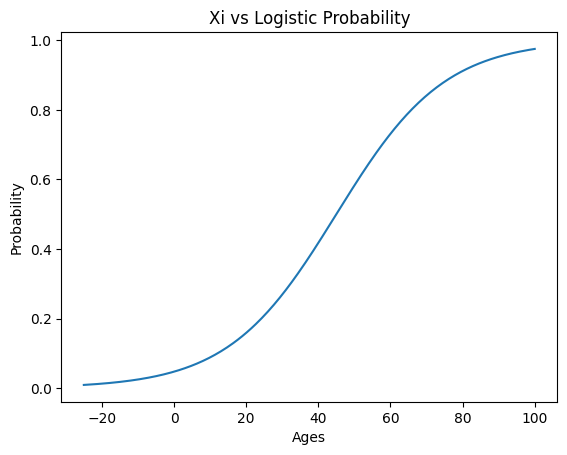

In [2]:
#I used Test aging to see example probabilties at each age. For our plt we will just use an evenly spaced age spread with np.linspace
test_aging = np.array([20,30,40,50,60,70,80,90])
b = -1/15
a = -3
def probabilities(a,b,Xi):  #our logistic model
    return 1/(1+ np.exp(-a+b*Xi))

model_probability = np.linspace(-25,100,300)  #This line manipulates the x axis; obviously age can't be negative but this is to see the full range
plt.plot(model_probability, probabilities(a,b,model_probability))
plt.xlabel("Ages"); plt.ylabel("Probability");plt.title("Xi vs Logistic Probability")

ages = rng.uniform(20,90, size = 1000) #THESE LINES ARE FOR PART B
Yi = rng.binomial(1, probabilities(a,b,ages))


Estimate for B: [[0.06685422]], Estimate For A: [-3.02635974]
Actual B: -0.06666666666666667, Actual A: -3


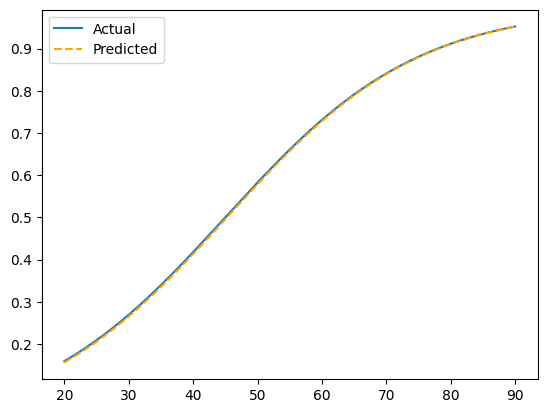

In [3]:
#Just fit with sci kit learn
from sklearn.linear_model import LogisticRegression
lfit = LogisticRegression().fit(X = np.vstack(ages), y = Yi)

ages_to_predict = np.linspace(20,90, 1000)
plt.plot(ages_to_predict, probabilities(a,b,ages_to_predict), label = "Actual")
plt.plot(ages_to_predict, lfit.predict_proba(np.vstack(ages_to_predict))[:,1], linestyle = '--', label = "Predicted", color = "Orange")
plt.legend()
#lfit.predict_proba(ages_to_predict.reshape(-1,1))
print(f"Estimate for B: {lfit.coef_}, Estimate For A: {lfit.intercept_}") 
print(f"Actual B: {b}, Actual A: {a}")

# 2. A new whale

In the file [data/whales.csv](data/whales.csv)
(direct link: [github](https://github.com/UOdsci/dsci345/raw/main/class_material/homeworks/data/whales.csv))
are the (average) body mass (in kg) and length (in m) of 43 modern cetacean species, from [this dataset](http://esapubs.org/archive/ecol/E090/184/metadata.htm).
Suppose that someone has found fossils of a new species of whale
that is about 8m long,
and they'd like to estimate how much it weighed,
based on the length-weight relationship of modern species.

*(a)* Read in the data and make a plot of mass against length.
    Also make a plot of log(mass) against log(length).

*(b)* Fit a linear model to predict log(mass) with log(length),
    i.e., find $a$ and $b$ so that
    $$ \log(\text{mass}) \approx a + b \log(\text{length}) , $$
    and add the resulting best-fit line to the plot of log(mass) against log(length).

*(c)* The predicted mass of a whale of length $\ell$ is $e^{a + b \log(\ell)}$.
    Add *this* line to the original plot of mass against length.

*(d)* What is the predicted weight of the 8m long whale?
    How far off do you estimate this prediction to be?
    (You can get the margin of error either by looking at the plot
    or computing the standard deviations of the residuals on a log scale, and transforming.)

**Explanation for Part A B and C**

I feel comfortable adding one big explanation because the work is not conceptually complex. I read the data in using Pandas and then from there I used matplotlib to make the scatterplots of the data. To manipulate the data to be in log(mass) and log(length) I used the np package. To find the $a$ and $b$ such that $\text{log(mass)} \approx a + b \log(\text{length })$ I used the sci kit learn package. I formulated my values to be a vertical stack of data points because I've found that to be the easiest for sci kit learn to handle. To add the log line to the original scatterplot, we can use the coefficients found in the sci kit learn and some nice vectorization to do this and add this line to the graph

**Code for Part A**

In [4]:
whales = pd.read_csv("whales.csv")
whales.head()

,Binomial,BodyMass,BodyLen
0,Balaenoptera musculus,154321,30.48
1,Balaenoptera physalus,47506,20.64
2,Delphinapterus leucas,1382,4.25
3,Delphinus delphis,79,2.44
4,Balaena mysticetus,79691,12.19


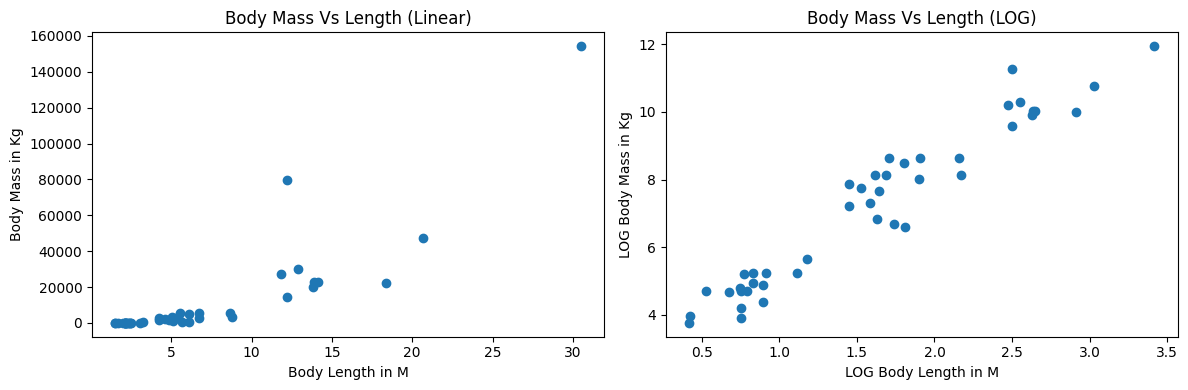

In [5]:
bodymass = whales["BodyMass"]
bodylen = whales["BodyLen"]
fig, axes = plt.subplots(1,2, figsize = (12,4))
axes[0].scatter(bodylen,bodymass)
axes[0].set_ylabel("Body Mass in Kg"); axes[0].set_xlabel("Body Length in M"); axes[0].set_title("Body Mass Vs Length (Linear)")
axes[1].scatter(np.log(bodylen),np.log(bodymass))
axes[1].set_ylabel("LOG Body Mass in Kg"); axes[1].set_xlabel("LOG Body Length in M"); axes[1].set_title("Body Mass Vs Length (LOG)")
plt.tight_layout()

**Code for B**

In [6]:
from sklearn.linear_model import LinearRegression as lm
linear_model = lm().fit(X = np.vstack(np.array(np.log(bodylen))),y =np.vstack(np.array(np.log(bodymass))))
linear_model

LinearRegression()

The value of a that makes this fit is: [2.6721752], b: [[2.83861336]]


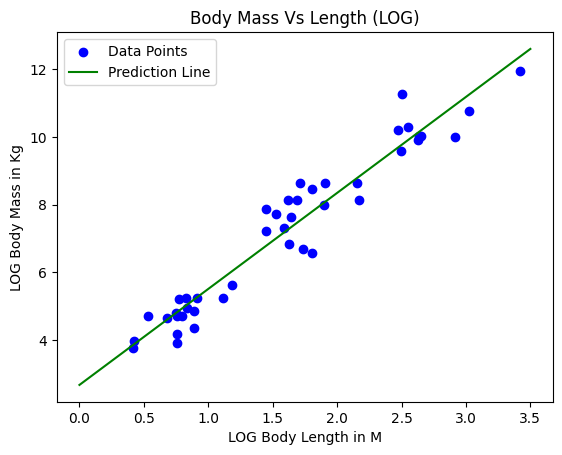

In [11]:
plt.scatter(np.log(bodylen), np.log(bodymass),label = "Data Points", color = "blue")
plt.ylabel("LOG Body Mass in Kg"); plt.xlabel("LOG Body Length in M"); plt.title("Body Mass Vs Length (LOG)")
masses = np.linspace(0,3.5,100)
predicted = linear_model.predict(np.vstack(masses))
plt.plot(masses,predicted, label = "Prediction Line", color = "Green")
plt.legend()
print(f"The value of a that makes this fit is: {linear_model.intercept_}, b: {linear_model.coef_}")

**Code for Part C**

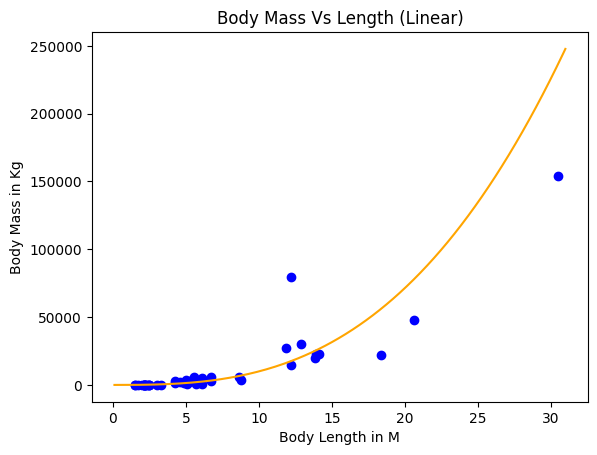

In [8]:
lengths = np.linspace(0.1,31, 200)
predicted_mass = (linear_model.intercept_[0] + linear_model.coef_[0][0]*np.log(lengths))
plt.scatter(bodylen,bodymass, label = "Data Points", color = "blue")    #BODY LENGTH IS ON THE X AXIS
plt.xlabel("Body Length in M"); plt.ylabel("Body Mass in Kg"); plt.title("Body Mass Vs Length (Linear)")
plt.plot(lengths,np.exp(predicted_mass), label = "Prediction Line", color = "orange")
#linear_model.intercept_[0], linear_model.coef_[0][0]

#Just checks to see if the numbers found later were correct, but not necessary
#plt.axvline(8, label = "8")
#plt.axhline(np.exp(linear_model.intercept_[0] + linear_model.coef_[0][0] * np.log(8)))
#plt.legend()

**Explanation for Part D**

To find the predicted weight of the 8m long whale were just going to plug 8 into our equation: $\text{log(mass)} \approx a + b \log(\text{length })$. But because we want the mass in kg were going to solve that equation for mass, which just requires $e$ to be raised to the power of the right side of the equation. After doing this we expect the weight to be about 5300 kg. To estimate the error it's clearer if you look at the log plot. To predict what that should be on the log scale, take the natural log of 8, with that being 2.07 and then plugging that into our log function to find the log weight to be 8.57. So now that we have this point (2.07, 8.57), it looks like that predicted point falls right inside of a cluster, so it should be quite accurate. To be a little more precise if we find the standard deviation of the log residuals (0.6), we can then create a rough 95% confident interval using our predicted point and 2 standard deviations up and down from our predicted point. From there we transform everything back out of logs to units we can work with, finding that we are 95% confident that our prediction should be within 1592 Kg and 17623 Kg. 

*(d)* What is the predicted weight of the 8m long whale?
    How far off do you estimate this prediction to be?
    (You can get the margin of error either by looking at the plot
    or computing the standard deviations of the residuals on a log scale, and transforming.)

In [12]:
w8 = np.exp(linear_model.intercept_[0] + linear_model.coef_[0][0] * np.log(8)) #Found using the equation described above
log_w8 = linear_model.intercept_[0] + linear_model.coef_[0][0] * np.log(8)
std_resid = 0
print(f"We would expect a whale of 8m to be {w8} Kg")

log_mass = np.log(np.array(whales["BodyMass"]))
log_len = np.log(np.array(whales["BodyLen"]))
log_predict_mass = linear_model.predict(np.vstack(log_len))
residuals = log_mass - log_predict_mass.T[0]
std_residuals = np.std(residuals)
print(f"The standard deviations of the residuals are {std_residuals}")


We would expect a whale of 8m to be 5297.052165335998 Kg
The standard deviations of the residuals are 0.6010484564541202


In [13]:
#predicted log weight is 8.57, the standard deviation is .60104 
#we are 95% confident between 2 standard deviations of our prediction, therefore we can find a lower bound of our prediciton by doing mean +-2*(std). 
#Once you have the upper and lower bound for weights, the confidence transfers after transformation, so raise e to the power of both to create the bound that we're confident for
lower = log_w8 - 2*std_residuals
upper = log_w8 + 2*std_residuals
print(f"We are 95% confident that our prediction should be within {np.exp(lower)} {np.exp(upper)}")


We are 95% confident that our prediction should be within 1592.0994557828224 17623.749282983412
